<a href="https://colab.research.google.com/github/LaXnZ/enhancing-sbmm-in-competitive-games/blob/model-evaluation/Saved_Model_Evaluating_Using_Testing_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounted at /content/drive
Confusion Matrix:
[[56  8]
 [14 72]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.88      0.84        64
           1       0.90      0.84      0.87        86

    accuracy                           0.85       150
   macro avg       0.85      0.86      0.85       150
weighted avg       0.86      0.85      0.85       150


AUC: 0.90


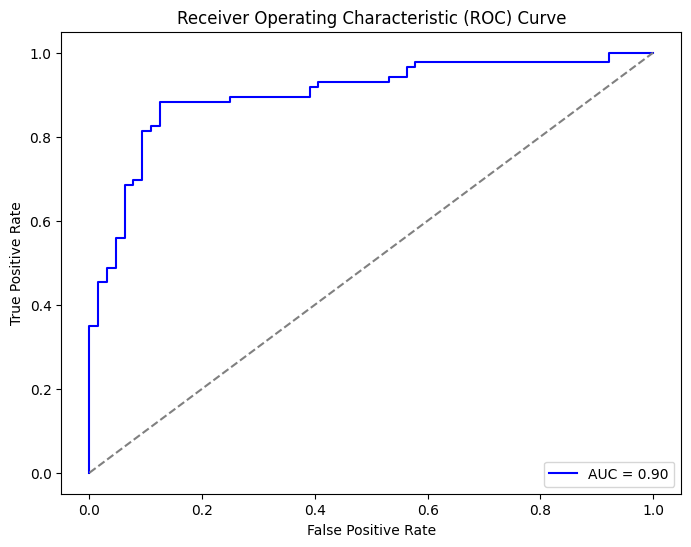


Average Precision: 0.93


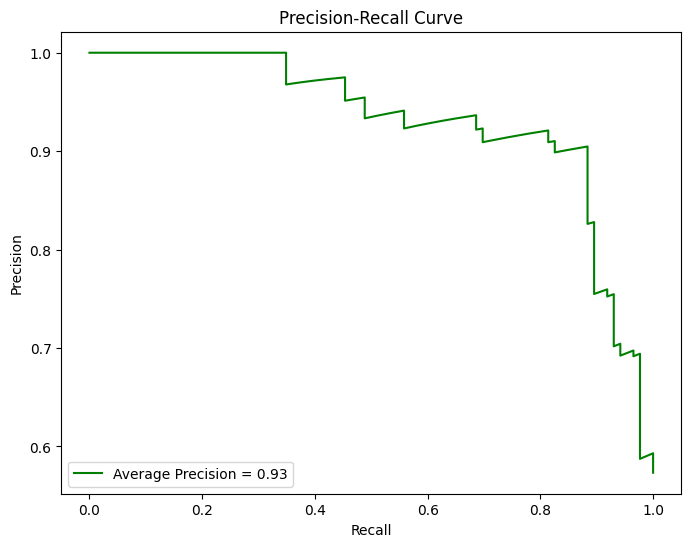

In [ ]:
import pandas as pd
import joblib
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.metrics import precision_recall_curve, average_precision_score

# Suppressing the warnings
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn")


from google.colab import drive
drive.mount('/content/drive')


# Load the saved testing dataset
test_data_path = '/content/drive/MyDrive/Final Year Project - APIIT/Datasets/testing_data.csv'
test_data = pd.read_csv(test_data_path)

# Separate features and target from the testing dataset
X_test = test_data.drop(columns=['Target'])  # Features
y_test = test_data['Target']  # Target

# Load the saved model
model_path = '/content/drive/MyDrive/Final Year Project - APIIT/Models/logistic_regression_model.pkl'
model = joblib.load(model_path)

# Make predictions using the loaded model
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for ROC curve

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# AUC/ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
print(f"\nAUC: {roc_auc:.2f}")

# Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)
average_precision = average_precision_score(y_test, y_prob)
print(f"\nAverage Precision: {average_precision:.2f}")

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='g', label=f'Average Precision = {average_precision:.2f}')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='lower left')
plt.show()
